In [1]:
import scipy
import numpy as np
import mpmath as mp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

In [2]:
class Config:
    data_path = '/home/vadbeg/Projects/University/STAT/data/data_first.xlsx'
    
config = Config()

## Load data

In [3]:
data = pd.read_excel(config.data_path)

data.head()

,"WORK_1 (Satisfaction at work, first dimension)","WORK_2 (Satisfaction at work, second dimension)","WORK_3 (Satisfaction at work, third dimension)","HOBBY_1 (Leisure satisfaction, first dimension)","HOBBY_2 (Leisure Satisfaction, second dimension)","HOME_1 (Satisfaction at home, first dimension)","HOME_2 (Satisfaction at home, second dimension)","HOME_3 (Satisfaction at home, third dimension)","MISCEL_1 (General satisfaction, first dimension)","MISCEL_2 (General satisfaction, second dimension)"
0,10.512588,10.165870,11.506034,10.099814,9.518444,10.028127,10.166690,8.555301,10.403460,11.027806
1,7.704902,7.293342,7.748509,7.274369,6.156300,9.385405,9.539173,8.860931,7.011529,7.200030
2,8.601670,8.220648,7.888889,7.795118,9.170513,8.677338,10.807003,9.334780,8.602111,7.068790
3,9.142470,10.610654,9.563982,9.090057,11.146616,10.024840,8.608050,9.382205,10.122391,8.266547
4,11.371432,9.202872,9.907894,7.927742,9.841610,10.401266,8.327109,6.962148,8.282023,7.002229


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   WORK_1 (Satisfaction at work, first dimension)     100 non-null    float64
 1   WORK_2 (Satisfaction at work, second dimension)    100 non-null    float64
 2   WORK_3 (Satisfaction at work, third dimension)     100 non-null    float64
 3   HOBBY_1 (Leisure satisfaction, first dimension)    100 non-null    float64
 4   HOBBY_2 (Leisure Satisfaction, second dimension)   100 non-null    float64
 5   HOME_1 (Satisfaction at home, first dimension)     100 non-null    float64
 6   HOME_2 (Satisfaction at home, second dimension)    100 non-null    float64
 7   HOME_3 (Satisfaction at home, third dimension)     100 non-null    float64
 8   MISCEL_1 (General satisfaction, first dimension)   100 non-null    float64
 9   MISCEL_2 (G

In [5]:
data.describe()

,"WORK_1 (Satisfaction at work, first dimension)","WORK_2 (Satisfaction at work, second dimension)","WORK_3 (Satisfaction at work, third dimension)","HOBBY_1 (Leisure satisfaction, first dimension)","HOBBY_2 (Leisure Satisfaction, second dimension)","HOME_1 (Satisfaction at home, first dimension)","HOME_2 (Satisfaction at home, second dimension)","HOME_3 (Satisfaction at home, third dimension)","MISCEL_1 (General satisfaction, first dimension)","MISCEL_2 (General satisfaction, second dimension)"
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,9.702958,9.816886,9.894298,9.802522,10.010813,9.950832,10.160288,10.137174,9.916294,9.822383
std,1.552089,1.126746,1.248538,1.593673,1.994109,1.197813,1.106155,1.273475,1.696749,1.911151
min,6.087592,6.590304,6.766254,5.460380,4.708794,7.375912,7.636383,6.962148,4.897767,5.005584
25%,8.648357,9.119591,9.105859,8.671417,8.916379,9.240690,9.506413,9.392412,8.841135,8.734123
50%,9.490816,9.789210,9.826256,9.969006,9.826405,9.889987,10.055039,9.990333,10.009557,9.668354
75%,10.599011,10.555221,10.739002,10.717705,11.196080,10.845140,11.075875,10.873016,10.894313,10.899156
max,13.887606,13.161053,12.922293,15.527287,17.597422,13.397865,13.288410,13.747925,15.075965,15.444268


In [6]:
data.columns[5]

'HOME_1 (Satisfaction at home, first dimension)'

## Functions 

In [7]:
def calculate_value(dispersion: float, sample_mean: float, alt_mean: float, num_of_values: int) -> float:
    t_value = (sample_mean - alt_mean) * np.sqrt(num_of_values) / np.sqrt(dispersion)
    
    return t_value


def get_critical_value(p: float, is_both_tails: bool = True):
    alpha = p
    
    if not is_both_tails:
        alpha = alpha * 2

    critical_value = (1 - alpha) / 2
    
    return critical_value

def get_laplace_function_value(x: float):
    value = x / np.sqrt(2)
    value = scipy.special.erf(value) / 2

    return value

def get_inverse_laplace_function_value(x: float):
    value = scipy.stats.norm.ppf(x + 0.5)
    
    return value


def calculate_sample_dispersion(x_list) -> float:
    x_list = np.array(x_list)
    x_list = x_list - np.mean(x_list)
    x_list = x_list ** 2
    
    sample_dispersion = np.sum(x_list) / (len(x_list) - 1)
    
    return sample_dispersion
    
    
def calculate_xi_squared(num_of_values: int, sample_dispersion: float, hypothesis_dispersion: float):
    xi_squeared_value  = (num_of_values - 1) * sample_dispersion / hypothesis_dispersion
    
    return xi_squeared_value

def get_probability_density_function_value(xi_squeared_value: float, degree_freedom_num: int = 1):
    probability_density_function_value = scipy.stats.chi2.cdf(xi_squeared_value, degree_freedom_num)
    
    return probability_density_function_value

def get_confidence_interval_value(confidence_value: float, degree_freedom_num: int = 1):
    confidence_interval_value = scipy.stats.distributions.chi2.ppf(
        q=confidence_value, 
        df=degree_freedom_num
    )
    
    return confidence_interval_value
    

## Dispersion is known

Н1 : μ ≠ μ0

In [8]:
dispersion = 1.0
mu_0 = 7
p = 0.03

In [9]:
examined_column = 'HOBBY_1 (Leisure satisfaction, first dimension)'
examined_feature_data = data[examined_column]

print(f'Examined feature ({examined_column}) stats:')
examined_feature_data.describe()

Examined feature (HOBBY_1 (Leisure satisfaction, first dimension)) stats:


count    100.000000
mean       9.802522
std        1.593673
min        5.460380
25%        8.671417
50%        9.969006
75%       10.717705
max       15.527287
Name: HOBBY_1 (Leisure satisfaction, first dimension), dtype: float64

<AxesSubplot:>

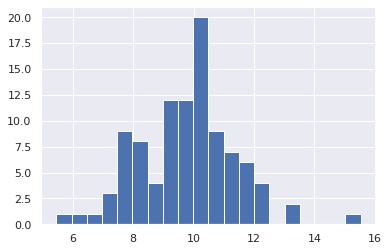

In [10]:
examined_feature_data.hist(bins=20)

In [11]:
examined_feature_mean = np.mean(examined_feature_data)
examined_feature_length = len(examined_feature_data)

dist_value = calculate_value(
    dispersion=dispersion,
    sample_mean=examined_feature_mean, 
    alt_mean=mu_0,
    num_of_values=examined_feature_length
)

print(f'Feature mean: {examined_feature_mean}')
print(f'Num of values: {examined_feature_length}')
print(f'T value: {dist_value}')

Feature mean: 9.802522298945599
Num of values: 100
T value: 28.025222989455987


In [12]:
critical_value = get_critical_value(p=p, is_both_tails=True)

print(f'Critical value: {critical_value}')

Critical value: 0.485


In [13]:
dist_value_critical = get_inverse_laplace_function_value(critical_value)

print(f'Dist value critical: {dist_value_critical}')

Dist value critical: 2.17009037758456


In [14]:
result_value_is_left = dist_value < -dist_value_critical
result_value_is_right = dist_value > dist_value_critical

result_value = result_value_is_left or result_value_is_right

print(f'For p value: {p} H_0 theory is {not result_value}')

For p value: 0.03 H_0 theory is False


## Dispersion is not known


Н1 : μ > μ0

In [15]:
mu_0 = 6
p = 0.04

In [16]:
examined_column = 'HOME_3 (Satisfaction at home, third dimension)'
examined_feature_data = data[examined_column]

print(f'Examined feature ({examined_column}) stats:')
examined_feature_data.describe()

Examined feature (HOME_3 (Satisfaction at home, third dimension)) stats:


count    100.000000
mean      10.137174
std        1.273475
min        6.962148
25%        9.392412
50%        9.990333
75%       10.873016
max       13.747925
Name: HOME_3 (Satisfaction at home, third dimension), dtype: float64

<AxesSubplot:>

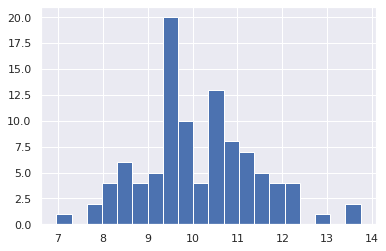

In [17]:
examined_feature_data.hist(bins=20)

In [18]:
sample_dispersion = calculate_sample_dispersion(examined_feature_data)

print(f'Sample dispersion: {sample_dispersion}')

Sample dispersion: 1.6217387765270723


In [19]:
examined_feature_mean = np.mean(examined_feature_data)
examined_feature_length = len(examined_feature_data)


dist_value = calculate_value(
    dispersion=sample_dispersion,
    sample_mean=examined_feature_mean, 
    alt_mean=mu_0,
    num_of_values=examined_feature_length
)

print(f'Feature mean: {examined_feature_mean}')
print(f'Num of values: {examined_feature_length}')
print(f'T value: {dist_value}')

Feature mean: 10.137173650375471
Num of values: 100
T value: 32.48727610763902


In [20]:
critical_value = get_critical_value(p=p, is_both_tails=False)

print(f'Critical value: {critical_value}')

Critical value: 0.46


In [21]:
dist_value_critical = get_inverse_laplace_function_value(critical_value)

print(f'Dist value critical: {dist_value_critical}')

Dist value critical: 1.7506860712521692


In [22]:
# result_value_is_left = critical_value < dist_value_critical
result_value_is_right = dist_value > dist_value_critical

# result_value = result_value_is_left or result_value_is_right

print(f'For p value: {p} H_0 theory is {not result_value_is_right}')

For p value: 0.04 H_0 theory is False


## Dispersion value hypothesis

$$H0: \sigma^2 =\sigma_{0}^2$$
$$H1: \sigma^2 \neq \sigma_{0}^2$$

In [23]:
dispersion_0 = 2
p = 0.01

In [24]:
examined_column = 'HOME_1 (Satisfaction at home, first dimension)'
examined_feature_data = data[examined_column]

print(f'Examined feature ({examined_column}) stats:')
examined_feature_data.describe()

Examined feature (HOME_1 (Satisfaction at home, first dimension)) stats:


count    100.000000
mean       9.950832
std        1.197813
min        7.375912
25%        9.240690
50%        9.889987
75%       10.845140
max       13.397865
Name: HOME_1 (Satisfaction at home, first dimension), dtype: float64

<AxesSubplot:>

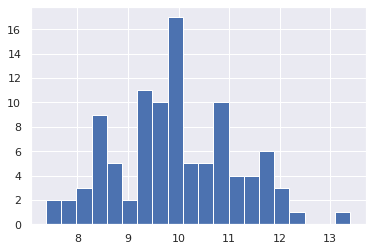

In [25]:
examined_feature_data.hist(bins=20)

In [26]:
sample_dispersion = calculate_sample_dispersion(examined_feature_data)

print(f'Sample dispersion: {sample_dispersion}')

Sample dispersion: 1.4347561348622884


In [27]:
examined_feature_mean = np.mean(examined_feature_data)
examined_feature_length = len(examined_feature_data)


xi_squared_value = calculate_xi_squared(
    num_of_values=examined_feature_length,
    sample_dispersion=sample_dispersion,
    hypothesis_dispersion=dispersion_0
)

print(f'Xi squared value: {xi_squared_value}')

Xi squared value: 71.02042867568328


In [28]:
probability_density_function_value = get_probability_density_function_value(
    xi_squeared_value=xi_squared_value,
    degree_freedom_num=examined_feature_length - 1
)

print(f'Probability density function value: {probability_density_function_value}')

Probability density function value: 0.015164779338946534


In [29]:
start_interval_value = p / 2
end_interval_value = 1 - p / 2

start_confidence_interval_value = get_confidence_interval_value(
    confidence_value=start_interval_value,
    degree_freedom_num=examined_feature_length - 1
)

end_confidence_interval_value = get_confidence_interval_value(
    confidence_value=end_interval_value,
    degree_freedom_num=examined_feature_length - 1
)

print(f'start_confidence_interval_value: {start_confidence_interval_value}')
print(f'end_confidence_interval_value: {end_confidence_interval_value}')

start_confidence_interval_value: 66.51010530173737
end_confidence_interval_value: 138.98678345093953


In [30]:
result_value_is_left = xi_squared_value < start_confidence_interval_value
result_value_is_right = xi_squared_value > end_confidence_interval_value

# result_value = result_value_is_left or result_value_is_right

print(f'For p value: {p} H_0 theory is {not result_value_is_right}')

For p value: 0.01 H_0 theory is True
